# Wine Quality

## Análisis Exploratorio de Datos
(EDA, Exploratory Data Analysis) 
 
##### Nivel: 
    Principiante
##### Objetivo del Proyecto: 
    Uso de funciones basicas de Pandas para realizar un EDA
    
##### Contenido del Cuaderno
    Se hace un paso a paso con base a la teoria planteada para realizar un EDA
    Se comparten los recursos utilizados en el proceso
    Se hace comentario al metodo o funcion utilizada, cuando corresponde
    Resumen de metodos y funciones utilizadas 


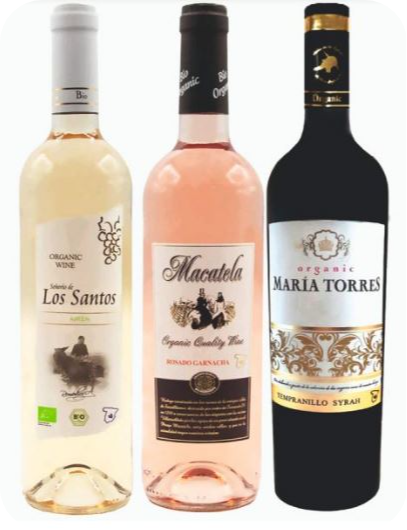


De acuerdo avinopak.es, al realizar una cata siempre tenemos en cuenta la fase visual, olfativa y gustativa; pero un vino tiene muchos más aspectos imperceptibles al ojo humano. Todos los procesos que suceden desde la viña a la copa, influyen de forma directa en la calidad final. Podríamos decir que hay varios indicadores físico-químicos.

1. Densidad
2. Grado alcohólico
3. pH
4. Acidez volátil
5. Color
6. Hierro


#### EDA 

Es un proceso iterativo, para obtener una comprensión de los datos a traves de la estadística y representaciones gráficas. Se resume en: explorar, entender y evaluar la calidad de los datos.

Se puede utilizar para: 
+ formular preguntas significativas-adecuadas que impacten el negocio (generen valor)
+ adquirir el conocimiento necesario del fenómeno que se va a estudiar 
+ tener una opinión de los datos 


Para guiar el proceso se sugiere formular el objetivo/pregunta que guie el analisis, y recordar durante el proceso. 


#### Pasos para realizar un EDA 
Puede variar de acuerdo a cada autor, el tipo de datos y la situacion de la data:

1. Comprensión general de los datos 
2. Preparación & Transformacion
3. Comprensión de la(s) variable(s) de interes
+ 3.1   Analisis Univariante 
+ 3.2 Analisis Multivariante (Estudio de las relaciones entre variables)
+     Identificar patrones
+     Identificar tendencias 
+     Identificar anomalias (valores atipicos) 
+     Correlaciones entre las variables
+     Hipotesis: Pruebas de Hipotesis o Formular Hipotesis
+     Analisis de varianza
4. Concluisiones y Recomendaiones
5. Presentar resultados


# Importar librerias y dataset 

In [1]:
#librerias

# manipulacion 
import pandas as pd                  
import numpy as np

# visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

#ignorar warnings 
import warnings
warnings.filterwarnings('ignore')


In [2]:
#leer dataset
dfw = pd.read_excel('MuestraWine.xlsx')


## 1. Comprensión general de los datos 
Explorar la estructura de los datos [1.1]

##### 1.1 tamaño del conjunto de datos
+ número de columnas (VARs)
+ numero de filas
+ cantidad de registros-obervaciones
+ rango temporalidad (abarca de x/x/xx hasta x/x/xx), cuando aplica

##### 1.2 ver tipos de datos 
+ comprender el significado de las VARs
+ verificar que cada variable se ha almacenado con el tipo de dato que le corresponde (categoricas, numericas, booleanno, texto, fecha)


##### 1.3 distribucion de los datos
+ datos faltantes (hacerlo por columna)
+ celdas vacias (algunas veces no correponde que tenga un dato-respuesta)
+ representación en gráficos para observar el comportamiento de la distribución de los datos
+ valores atipicos (datos que puedan afectar los resultados del análisis), estos valores pueden ser errores de medición, datos erróneos o datos que están fuera del rango normal

### Consideraciones Generales
a) En el proceso analizar 
+ cual es la importancia de la VAR analizada (alta, media, baja)
+ qué variables son relevantes y cuáles no son relevantes para el analisis (Tener en mente el objetivo del analisis / pregunta planteada)
+ si se tiene o no algún comentario o dudas de la(s) variable(s)

b) Se sugiere tomar notas en otro archivo (Excel, CSV) respecto a:
+ nombre de la(s) VAR(s) y su significado
+ cuantas y tipo de VAR(s): categorica, numerica, booleana
+ contexto: de donde se obtuvo la informacion, de un area o sector especifico (la construccion, algun segmento de la poblacion, tipo de material, nivel social, tipo de persona). 

##### ------
En este ejercicio se decidio analizar la VAR "quality" y el contexto es quimico-fisico

Si se consulta la documentación de Sklearn sobre este conjunto de datos, se observa que fue construido para tareas de clasificación.


### 1.1 tamaño del conjunto de datos

In [3]:
#descripcion dataset
dfw.info()             


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         500 non-null    float64
 1   volatile acidity      500 non-null    float64
 2   citric acid           500 non-null    float64
 3   residual sugar        500 non-null    float64
 4   chlorides             500 non-null    float64
 5   free sulfur dioxide   500 non-null    float64
 6   total sulfur dioxide  500 non-null    int64  
 7   density               500 non-null    float64
 8   pH                    500 non-null    float64
 9   sulphates             500 non-null    float64
 10  alcohol               500 non-null    float64
 11  quality               500 non-null    int64  
 12  good                  500 non-null    int64  
 13  color                 500 non-null    object 
dtypes: float64(10), int64(3), object(1)
memory usage: 54.8+ KB



El metodo '.info()' da información sobre un DataFrame (df):
+ Informacion general de los datos de cada cloumna
+ Indica el numero de filas del dataset
+ Muestra el numero de datos No Nulos por columna (valores validos)
+ Tipo de dato de cada columna
+ Tamaño total del dataset

Con este se pueden realizar los pasos 1.1 y 1.2. Tambien se puede realizar con otros metodos y funciones de forma separada. 

En este caso el df tiene 500 filas, 14 columnas y describe el tipo de las columnas en el Dtype. El dataset original tiene 5320 columnas, para este ejercicio se obtuvo una muestra de alrededor del 10%. Se hicieron ambos ejercicios y la estructura en los datos se mantuvo en la muestra.  

### 1.2 ver tipo de datos
+ comprender el significado de las VARs
+ verificar que cada variable se ha almacenado con el tipo de dato que le corresponde

In [3]:
#tipos de datos

## conteo tipo datos
print('"1. Conteo Tipo de Dato"')
tipos_datos = dfw.dtypes                           
print(tipos_datos.value_counts())                  
print('==========================')

## tipo datos en % 
print('"2. % por Tipo de Dato"')
tipos_datos = dfw.dtypes
print(tipos_datos.value_counts(normalize=True))   


"1. Conteo Tipo de Dato"
float64    10
int64       3
object      1
dtype: int64
"2. % por Tipo de Dato"
float64    0.714286
int64      0.214286
object     0.071429
dtype: float64



El metodo '.dtypes' da el tipo de datos del df.

Cerca del 77% son datos tipo decimal (float64), los menos son enteros (int64).

In [4]:
#ver primeras lineas del dataset 
dfw.head()           


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,5.9,0.12,0.27,4.8,0.030,40.0,110,0.99226,3.55,0.68,12.1,6,0,white
1,7.7,0.42,0.38,8.1,0.061,49.0,144,0.99660,3.40,0.58,11.0,6,0,white
2,6.6,0.44,0.32,3.0,0.095,13.0,75,0.98954,3.10,0.63,12.8,6,0,white
3,7.2,0.66,0.03,2.3,0.078,16.0,86,0.99743,3.53,0.57,9.7,5,0,red
4,6.2,0.32,0.32,2.2,0.036,15.0,70,0.98990,3.16,0.48,12.7,6,0,white


In [5]:
#ver nombre columns
dfw.columns 


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'good', 'color'],
      dtype='object')

### 1.3 distribucion de los datos

In [6]:
#1.3.1 detectar valores faltantes  
print(dfw.isna().sum())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
good                    0
color                   0
dtype: int64


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>,
        <AxesSubplot:title={'center':'residual sugar'}>],
       [<AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>],
       [<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>],
       [<AxesSubplot:title={'center':'good'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

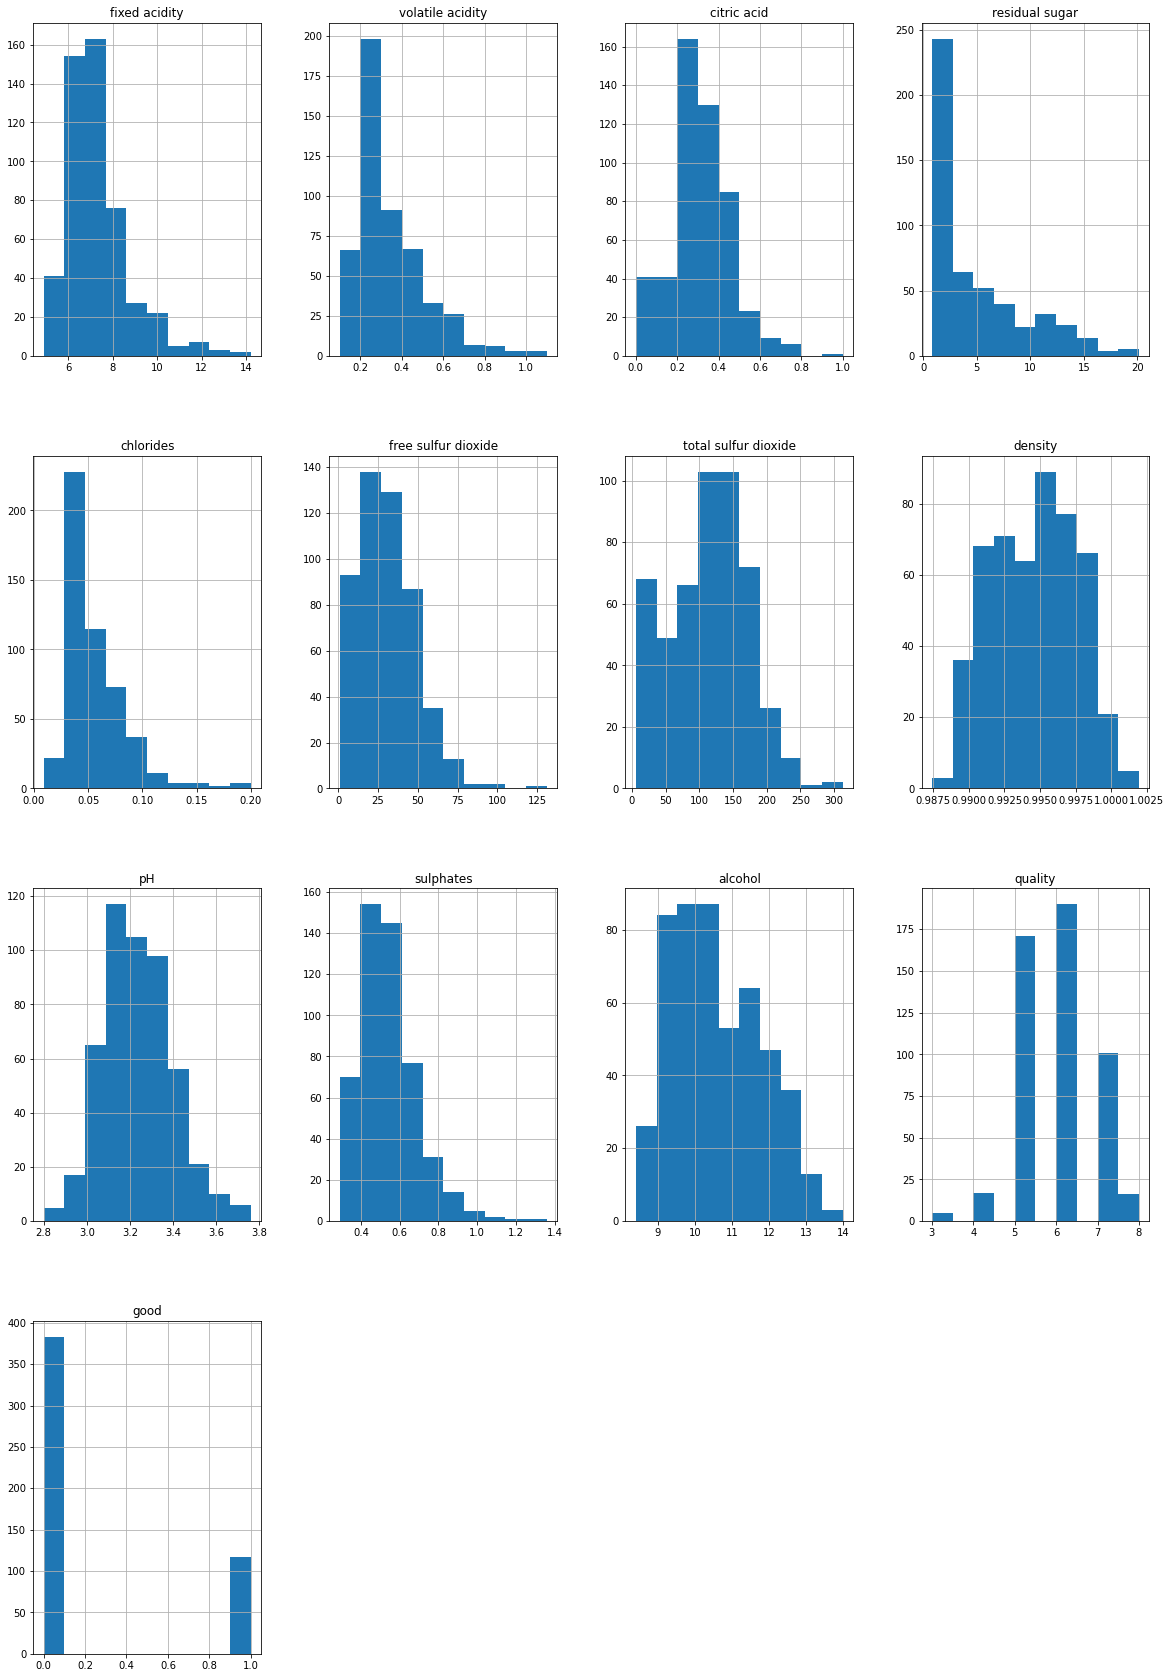

In [7]:
#1.3.2 visualizar distribucion por VAR
import matplotlib.pyplot as plt
%matplotlib inline

dfw.hist(figsize=(20,30))



El histograma es una grafica para visualizar una tabla de frecuencias.
Se utilizar para:
+ VAR cuantitativa y continua
+ obtener una primera vista de una VAR 
+ comprender la distribución de sus datos y escoger herramientas de análisis estadístico adecuadas
+ comprobar valores extremos o atípicos

x = grupo-contenedores-rango de valores 

y = recuento de los datos-conteo de cada rango
No hay espacio entre barras

Eje:
citric acid, entre los valores 0.0 y 0.2 hay 40 datos    


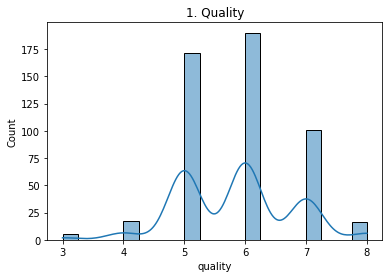

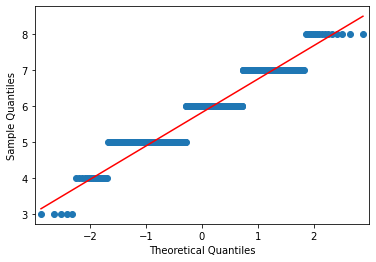

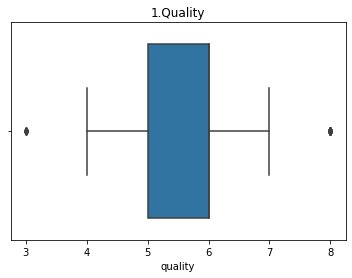

In [9]:
#1.3.3 representación gráfica para observar el comportamiento de la VAR de interes 

#histograma
import seaborn as sns
import matplotlib.pyplot as plt
fig = sns.histplot(dfw['quality'], kde="True").set (title = '1. Quality')

#grafico Q-Q, verificar visualmente si un conjunto de datos se distribuye normalmente o no
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

qqplot(dfw['quality'], line = 's')
plt.show ()

#Box Plot, valores atipicos 
sns.boxplot(x=dfw['quality']).set (title = '1.Quality')
plt.show() 


## 2. Preparación & Transformacion 

Considerar: 

+ eliminar valores nulos
+ columnas o registros duplicados
+ valores atípicos (tratamiento de valores y verificar que no se deben a un error de medición o de construcción del dataset, repetir los análisis con y sin valores inusuales y documentar cada decisión adoptada )
+ transformar datos en un formato adecuado para el análisis
+ estandarizar variables, en caso proceda
+ imputar datos faltantes (tratamiento de datos ausentes  y experimentar)
+ variables inútiles, verificar que las VARs tienen relacion con el dataset
+ variables redundantes 
+ la nomenclatura-terminologia-nombre de las VAR(s) es correcta (dice lo que es) 
+ se requiere crear otras variables  [1.2]

En este caso todas las variables parecen ser medidas físico-químicas. Esto significa que todas podrían ser útiles y ayudar a definir la 'quality'. No hay motivos para eliminar columnas.


In [10]:
#eliminar datos duplicados 

#ver si hay filas duplicadas
print(dfw.duplicated().sum())

#eliminar filas duplicados
print(dfw.drop_duplicates(inplace=True))

#verificar el tamano actual del dataset 
print(dfw.shape)


0
None
(500, 14)


In [11]:
#renombrar columnas
dfw.rename(columns={"fixed acidity": "fixed_acidity","volatile acidity": "volatile_acidity",  'citric acid': 'citric_acid', 'residual sugar':'residual_sugar','free sulfur dioxide':'free sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

#verificar cambios
dfw.columns 

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'good', 'color'],
      dtype='object')

In [12]:
#eliminar columna 'good'
dfw = dfw.drop(['good'], axis=1)


In [13]:
#verificar eliminacion columna 'good'
dfw.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         500 non-null    float64
 1   volatile_acidity      500 non-null    float64
 2   citric_acid           500 non-null    float64
 3   residual_sugar        500 non-null    float64
 4   chlorides             500 non-null    float64
 5   free sulfur_dioxide   500 non-null    float64
 6   total_sulfur_dioxide  500 non-null    int64  
 7   density               500 non-null    float64
 8   pH                    500 non-null    float64
 9   sulphates             500 non-null    float64
 10  alcohol               500 non-null    float64
 11  quality               500 non-null    int64  
 12  color                 500 non-null    object 
dtypes: float64(10), int64(2), object(1)
memory usage: 54.7+ KB


## 3. Comprensión de la(s) variable(s) de interes 

Recorrer todas y cada una de las variables relevantes, y obtener un analisis basico descriptivo-comportamiento, que permita comprender-entender cada VAR: [1.3]

+ total de datos
+ distribucion
+ estadisticas basicas 
+ datos atipicos 

En este caso la VAR 'quality', es un analisis univariante

### 3.1 Analisis Univariante

Se analiza cada una de las variables, esto implica:

+ calcular estadísticas descriptivas (la media, la mediana, la desviación estándar, etc)

+ es posible utilizar visualizaciones, como histogramas, gráficos de barras, gráficos de dispersión, etc.

 #### 3.1.1 VAR de interes 'quality'

In [14]:
#ver tipo de categorias de la VAR 'quality'
print ("Tipos de Quality", dfw['quality'].unique())


Tipos de Quality [6 5 7 4 8 3]


In [15]:
#ver tipo de datos de la VAR 'quality'

#conteo por tipo de dato
conteo_quality = dfw['quality'].value_counts()
print('"1. Conteo Por Categoria"')
print(conteo_quality)
print('==========================')

#porcentaje por tipo de dato
porcentaje_quality = dfw['quality'].value_counts(normalize=True)
print('"2. Porcentaje Por Categoria"')
print(porcentaje_quality)

porcentaje_quality = conteo_quality / sum(conteo_quality) * 100
print(porcentaje_quality)


"1. Conteo Por Categoria"
6    190
5    171
7    101
4     17
8     16
3      5
Name: quality, dtype: int64
"2. Porcentaje Por Categoria"
6    0.380
5    0.342
7    0.202
4    0.034
8    0.032
3    0.010
Name: quality, dtype: float64
6    38.0
5    34.2
7    20.2
4     3.4
8     3.2
3     1.0
Name: quality, dtype: float64


Text(0.5, 1.0, 'Calidad del Vino por Categoria')

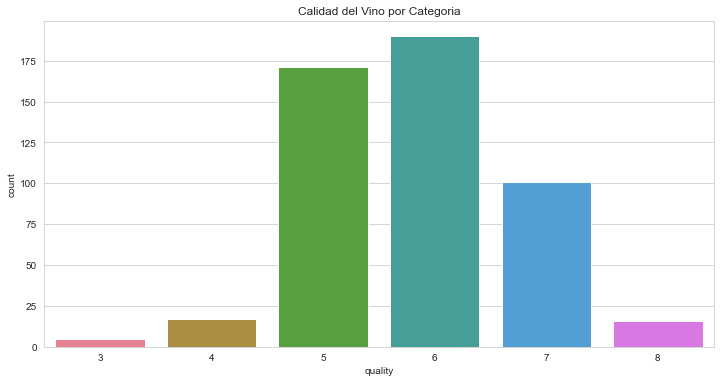

In [16]:
#grafica 'quality'
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.countplot(x='quality', data=dfw, palette='husl')
plt.title("Calidad del Vino por Categoria")



+ Se tienen seis categorias de la calidad del vino
+ La calidad 6, tiene un 43.7%
+ Las calidades 6, 5 y 7, representan el 93.2% de la muestra


#### 3.1.2 VAR numerica

In [17]:
#estadistica descriptiva
round(dfw.describe(), 2).T.style.background_gradient(cmap='YlOrRd')               


,count,mean,std,min,25%,50%,75%,max
fixed_acidity,500.000000,7.300000,1.390000,4.900000,6.400000,7.000000,7.800000,14.200000
volatile_acidity,500.000000,0.350000,0.170000,0.100000,0.230000,0.300000,0.420000,1.100000
citric_acid,500.000000,0.310000,0.150000,0.000000,0.240000,0.310000,0.390000,1.000000
residual_sugar,500.000000,5.070000,4.350000,0.800000,1.900000,2.800000,7.430000,20.150000
chlorides,500.000000,0.060000,0.030000,0.010000,0.040000,0.050000,0.070000,0.200000
free sulfur_dioxide,500.000000,30.310000,17.760000,1.000000,17.000000,28.000000,42.000000,131.000000
total_sulfur_dioxide,500.000000,113.610000,57.320000,6.000000,73.000000,117.000000,153.000000,313.000000
density,500.000000,0.990000,0.000000,0.990000,0.990000,0.990000,1.000000,1.000000
pH,500.000000,3.230000,0.160000,2.800000,3.130000,3.220000,3.330000,3.760000
sulphates,500.000000,0.540000,0.150000,0.290000,0.440000,0.520000,0.620000,1.360000


"1. Estadistica Descriptiva Quality"
count    500.00000
mean       5.82600
std        0.93245
min        3.00000
25%        5.00000
50%        6.00000
75%        6.00000
max        8.00000
Name: quality, dtype: float64
"2. Asimetria y Curtosis"
asimetria = 0.03998143770000081
curtosis =  0.03228130393701756


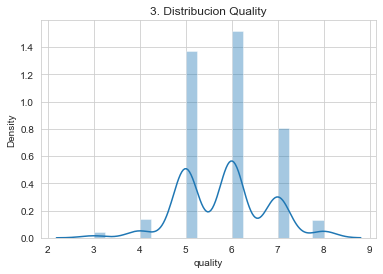

In [19]:
#analisis descriptivo 'quality'

#estadistica descriptiva
print('"1. Estadistica Descriptiva Quality"')
print(dfw.quality.describe())
print('======================')

#curtosis y aseimetria 
print('"2. Asimetria y Curtosis"')
print("asimetria =" , dfw['quality'].skew())
print("curtosis = " , dfw['quality'].kurt())
print('======================')

#distribucion
distribucion = sns.distplot(dfw['quality'])
plt.title('3. Distribucion Quality')
plt.show(distribucion)



Del analisis de esta informacion se puede concluir si la VAR:
+ sigue una ditribucion normal
+ muestra picos
+ tiene valores de curtosis y aseimetria > 1

Se obtiene un analisis descriptivo-comportamiento para entender cada VAR

### 3.2 Analisis Multivariante (Estudio de las relaciones entre variables) 

Se trata de encontrar relaciones que:
+ muestren la influencia de una variable sobre otra variable
+ influencia de la(s) VAR(s) sobre la VAR objetivo (con base al objetivo definido)
+ Identificar patrones
+ Identificar tendencias 
+ correlaciones entre las variables
+ Hipotesis: Pruebas de Hipotesis o Formular Hipotesis
+ Analisis de varianza 

Este paso aporta las primeras opciones de inteligencia de negocio al ofrecer valor y la posibilidad de actuar estratégicamente.


In [20]:
#matriz de correlacion
matriz_correlation = dfw.corr().style.background_gradient(cmap='Spectral')      
matriz_correlation


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.176649,0.403102,-0.134010,0.348281,-0.293566,-0.302788,0.491007,-0.254373,0.313126,-0.148949,-0.085479
volatile_acidity,0.176649,1.000000,-0.398634,-0.184590,0.412664,-0.396774,-0.448420,0.284361,0.269168,0.227059,-0.050844,-0.242075
citric_acid,0.403102,-0.398634,1.000000,0.163093,-0.044697,0.137081,0.211720,0.100898,-0.332298,0.006532,0.032057,0.068274
residual_sugar,-0.134010,-0.184590,0.163093,1.000000,-0.187853,0.386148,0.503156,0.456526,-0.214170,-0.201996,-0.295659,-0.046601
chlorides,0.348281,0.412664,-0.044697,-0.187853,1.000000,-0.260725,-0.374226,0.465443,0.106630,0.303352,-0.348956,-0.269247
free sulfur_dioxide,-0.293566,-0.396774,0.137081,0.386148,-0.260725,1.000000,0.753060,-0.047255,-0.140034,-0.185800,-0.125534,0.071896
total_sulfur_dioxide,-0.302788,-0.448420,0.211720,0.503156,-0.374226,0.753060,1.000000,-0.037027,-0.217669,-0.336020,-0.183536,-0.046033
density,0.491007,0.284361,0.100898,0.456526,0.465443,-0.047255,-0.037027,1.000000,0.068786,0.287836,-0.724689,-0.350896
pH,-0.254373,0.269168,-0.332298,-0.214170,0.106630,-0.140034,-0.217669,0.068786,1.000000,0.218425,0.074421,-0.002853
sulphates,0.313126,0.227059,0.006532,-0.201996,0.303352,-0.185800,-0.336020,0.287836,0.218425,1.000000,-0.022322,0.066957



El método .corr() por defecto es "pearson", el Coeficiente de Correlacion de Pearson o coeficiente de correlación producto-momento de Pearson. El modelo mide y muestra la interdependencia en relaciones asociadas o entre cada pareja de variables y todas al mismo tiempo.

La matriz de correlación, es una tabla de doble entrada, que muestra una lista multivariable horizontal y vertical, con el correspondiente coeficiente de correlación entre cada pareja en cada celda, expresada con un número que va de −1 a +1 [1.4].


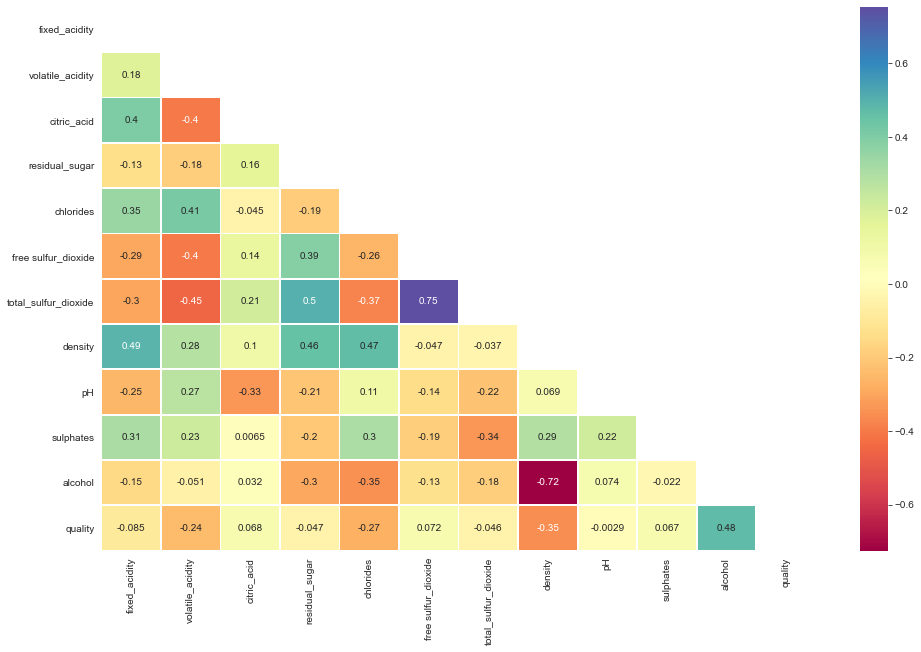

In [22]:
#grafico de correlacion con heatmap 
plt.figure(figsize=(16, 10))
matrix = np.triu(dfw.corr())
sns.heatmap(dfw.corr(), annot=True,
            linewidth=.8, mask=matrix, cmap="Spectral");



Un mapa de calor de correlaciones, permite generar una imagen con los valores de las relaciones de cada columna del df. Visualmente da diferentes colores para representar la correlación de variables [2.2]

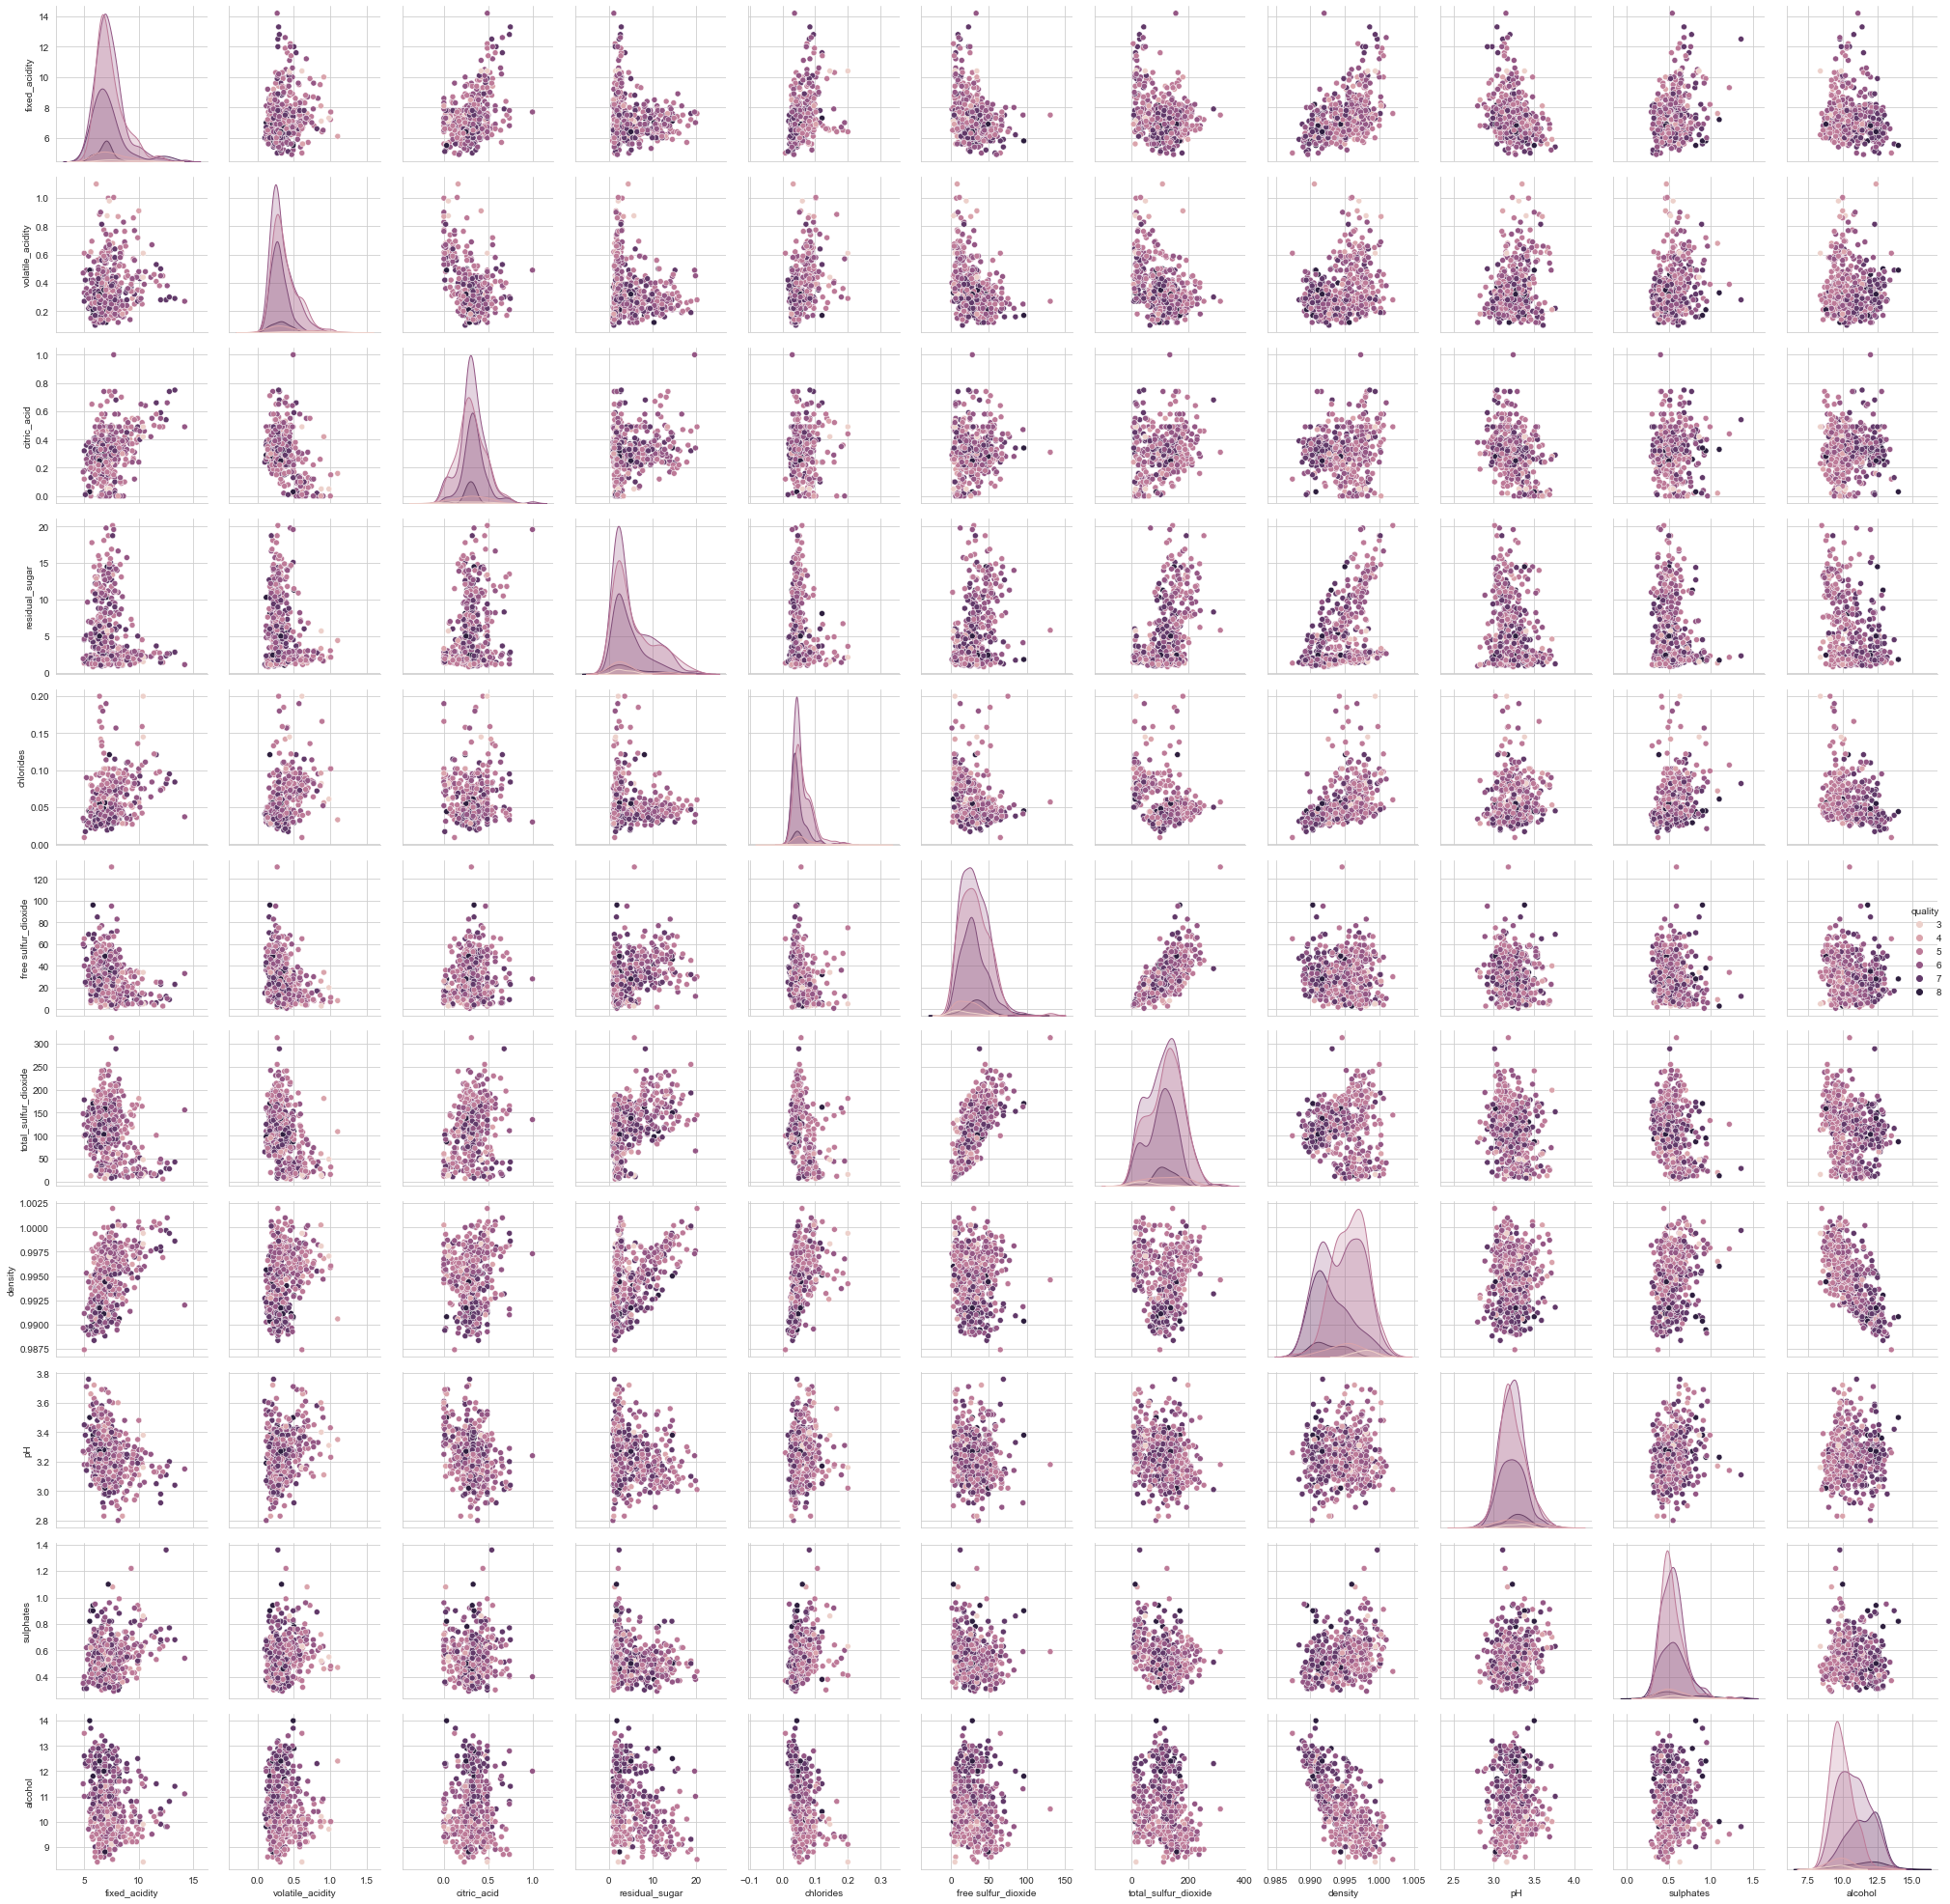

In [21]:
#analisis multivariante
sns.pairplot(dfw, hue = 'quality')      #argumento de tono de color(Hue) para columnas categóricas    
plt.tight_layout()                      #ajusta los títulos de los ejes de una manera más precisa.



El método.pairplot(), generar un histograma y un grafico de densidad para mostrar la distribucion de cada variable, y las relaciones entre variables de un conjunto de datos. Su uso es más adecuado para conjuntos de datos con un número relativamente bajo de variables o mostrar las variables con mayor correlación encontradas con el método .corr().   

Desventajas
+ mostrar todas las variables al mismo tiempo en el gráfico puede resultar excesivo dando resultados poco analizables 
+ requiere bastante tiempo de procesamiento, siendo su cálculo costoso [2.2]


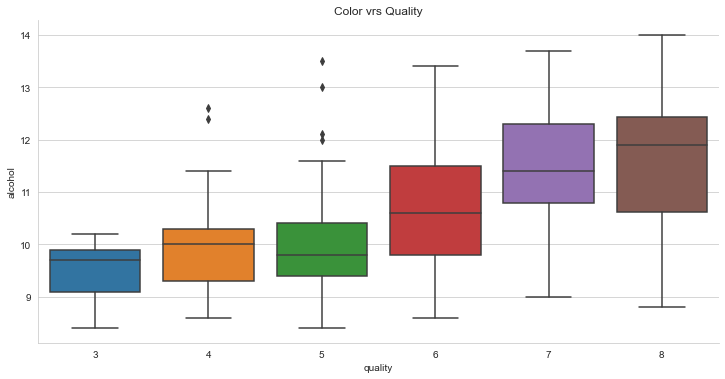

In [32]:
#relacion entre VAR numericas y categoricas , boxplot-diagrama de caja 
sns.catplot(x="quality" , y="alcohol" , data=dfw , kind ="box" , aspect=2)   #aspect:ancho grafica
plt.title("Color vrs Quality")
plt.show()



Los boxplots (diagrama de caja) y violin plots, se utilizan para mostrar la distribución de datos categóricos. 

Un boxplots muestra la distribución de datos cuantitativos de una manera que facilita las comparaciones entre variables o entre niveles de una variable categórica. El cuadro muestra los cuartiles del conjunto de datos, mientras que los bigotes se extienden para mostrar el resto de la distribución, a excepción de los puntos que se determinan como “valores atípicos” [2.4]. 

## ------------------------------------------

### 1. Notas 


#### [1.1] Funciones de Pandas para Comprensión general de los datos

.describe() = estadistica descriptiva

.info()  = descripcion general del dataset (tipo dato, nulos, uso memoria)

.isna()

.dtypes

.shape

.head()  

.tail()

.shape = total lineas y columns

.columns = ver titulo columns

Documentacion oficial Pandas
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info 


#### [1.2]Funciones de Pandas para la Preparación & Transformacion

.duplicated().sum() = filas duplicadas

.drop_duplicates(inplace=True) = eliminar duplicadas 

.drop(columns="Id",inplace=True) = eliminar columna

.rename(columns={"fixed acidity": "fixed_acidity"}, inplace=True) = renombrar columna

.isnull().sum() = ver nulos 

.isna().sum()

.duplicated().sum() = filas duplicadas 

print("The Value Quality ",df["quality"].unique()) = ver datos de una columna 



#### [1.3] Funciones de Pandas para Comprensión de las variable(s) de interes 


Se puede explorar las relaciones con Seaborn y pairplot


.unique() = ver valores unicos en la VAR

.value_counts() = cuenta cuantos valores unicos hay 

.describe() = estadistica descriptiva 



.corr() = matriz de correlacion

.hist()

.skew() = asimetria

.kurt() = curtosis

sns.distplot(dfw['sulphates'])

sns.pairplot() = 

sns.heatmap = rafico de correlacion con heatmap



#### [1.4] Coeficiente de Correlacion de Pearson 
o coeficiente de correlación producto-momento de Pearson. En estadística correlacion-asociacion o dependencia. En general, la presencia de una correlación no es suficiente para inferir la presencia de una relación causal.

Es una medida del grado en que un par de variables se relacionan linealmente y se basa en la covarianza entre ellas. Es adecuado para variables continuas, asumiendo que ambas variables siguen una distribución normal.

Las correlaciones son útiles porque pueden indicar una relación predictiva que puede explotarse en la práctica (Eje: correlación entre el precio de un bien y la cantidad que los consumidores están dispuestos a comprar).

##### Covarianza
Es una medida de la variabilidad conjunta de dos variables aleatorias. 

Si los valores mayores de una variable se corresponden principalmente con los valores mayores de la otra variable, y lo mismo ocurre con los valores menores (es decir, las variables tienden a mostrar un comportamiento similar), la covarianza es positiva. En caso contrario, cuando los mayores valores de una variable corresponden mayoritariamente a los menores valores de la otra, (es decir, las variables tienden a mostrar comportamientos opuestos), la covarianza es negativa. 

El signo de la covarianza, por lo tanto, muestra la tendencia en la relación linealentre las variables. 

La magnitud de la covarianza es la media geométrica de las varianzas que son comunes para las dos variables aleatorias. El coeficiente de correlación normaliza la covarianza al dividir por la media geométrica de las varianzas totales de las dos variables aleatorias.

Se debe distinguir entre 

(1) la covarianza de dos variables aleatorias, que es un parámetro poblacional que puede verse como una propiedad de la distribución de probabilidad conjunta , y 

(2) la covarianza muestral, que además de servir como descriptor de la muestra, sirve también como valor estimado del parámetro poblacional.


### 2. Recursos Utilizados

[2.1] Guía práctica de introducción al Análisis Exploratorio de Datos (https://datos.gob.es/), Plantilla y Flujo de trabajo EDA (D'Agostino, A.).

[2.2] (Torre, J.)

[2.4] (Zapata, J.) 

Foto: bodegaehd.com
